
# Project: Medical Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>Data descibe 110.527 medical appointments. why does a person makes a doctor appointment, receives all the instructions and no-show?
what can be the reasons for that?
Here will study and analysis the most important characteristics that could influence if the patient show-up or no-show to the appointment by the following questions.

> 1 - What is the rate of  patient  show-up or not in his appointment ?

> 2-Is age indicative of whether a patient will make their appointments?

> 3-What is the relation between the diseases type and no-shows?

> 4-Does having Scholarship influence patient decision of shows up or not?

> 5-Do SMS-reminders increase ratio of patients showing up?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> 

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('show-appointment-May-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


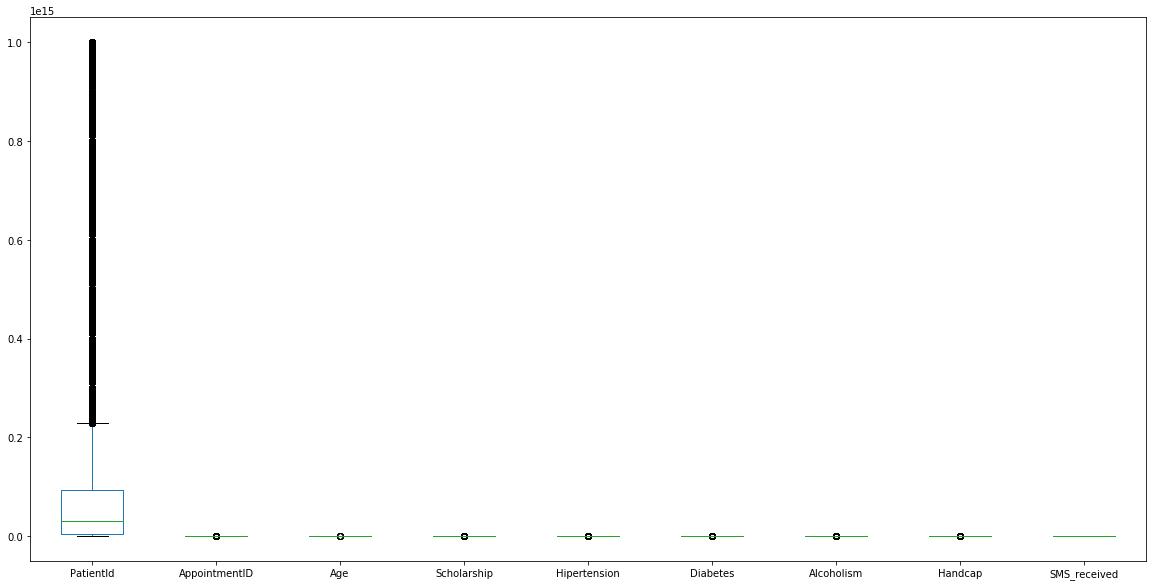

In [4]:
df.info()
df.describe()
df.plot(kind='box', figsize=(20,10));

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [5]:
#check null values.
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

show that there is no null values found.


In [6]:
#check duplicates.
sum(df.duplicated())

0

shows that there is no duplicate in data found.


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,4.314932e+14,5640380,M,2016-04-29T10:37:02Z,2016-04-29T00:00:00Z,0,MONTE BELO,0,0,0,0,0,0,No
101,6.822847e+13,5642813,M,2016-04-29T17:24:19Z,2016-04-29T00:00:00Z,0,BONFIM,0,0,0,0,0,0,No
104,3.326985e+12,5632495,F,2016-04-28T08:04:48Z,2016-04-29T00:00:00Z,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,8.468587e+14,5560742,M,2016-04-08T09:29:23Z,2016-04-29T00:00:00Z,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
150,5.392419e+10,5641476,M,2016-04-29T13:43:34Z,2016-04-29T00:00:00Z,0,ITARARÉ,0,0,0,0,0,0,No


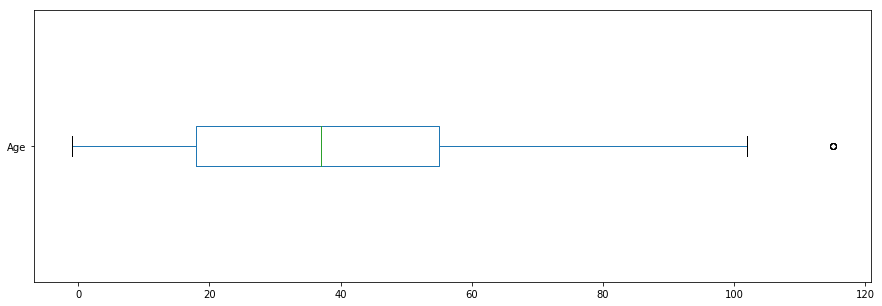

In [7]:
#check validity of age in dataset 
df['Age'].plot(kind='box' , vert=False , figsize=(15,5));
df[df.Age <= 0]


there is a 3540 non valid value in which age=-1 or zero.


In [8]:
# delete non valid value in age.
df = df[df.Age >=1]
df[df.Age <= 0].count()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

non vaild age deleted.

In [44]:
# make ScheduledDay,AppointmentDay to date time.
df.loc[:, ['ScheduledDay', 'AppointmentDay']] = df.loc[:, ['ScheduledDay', 'AppointmentDay']].apply(pd.to_datetime)
day_from_datetime = lambda dt: dt.day_name()
df['DayOfWeek'] = df.AppointmentDay.apply(day_from_datetime)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1( What is the rate of patient show-up or not in his appointment ?) 

In [10]:
df_show= df[df['No-show']=='No'] 
df_notshow= df[df['No-show']=='Yes']     
df_show


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No
10,7.345362e+14,5630213,F,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,No
12,5.666548e+14,5634718,F,2016-04-28 11:33:51,2016-04-29,22,NOVA PALESTINA,1,0,0,0,0,0,No


In [11]:
df_notshow

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,2016-04-28 09:28:57,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27 07:51:14,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes
21,1.215484e+13,5628338,F,2016-04-27 10:50:45,2016-04-29,4,CONQUISTA,0,0,0,0,0,0,Yes
22,8.632298e+14,5616091,M,2016-04-25 13:29:16,2016-04-29,13,CONQUISTA,0,0,0,0,0,1,Yes
31,3.112849e+11,5628907,M,2016-04-27 12:07:14,2016-04-29,12,NOVA PALESTINA,1,0,0,0,0,0,Yes
44,2.741649e+11,5635414,F,2016-04-28 13:27:27,2016-04-29,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes
48,8.545415e+12,5618643,F,2016-04-26 07:19:49,2016-04-29,58,SÃO CRISTÓVÃO,0,0,0,0,0,1,Yes


Num of patient come to their appointments {NO}  :  85307
With percent   :  79.7358557582
Num of patient who didnt come to their appointments {Yes} :  21680
With percent   :  20.2641442418


Text(0.5,1,' patient show in appointments')

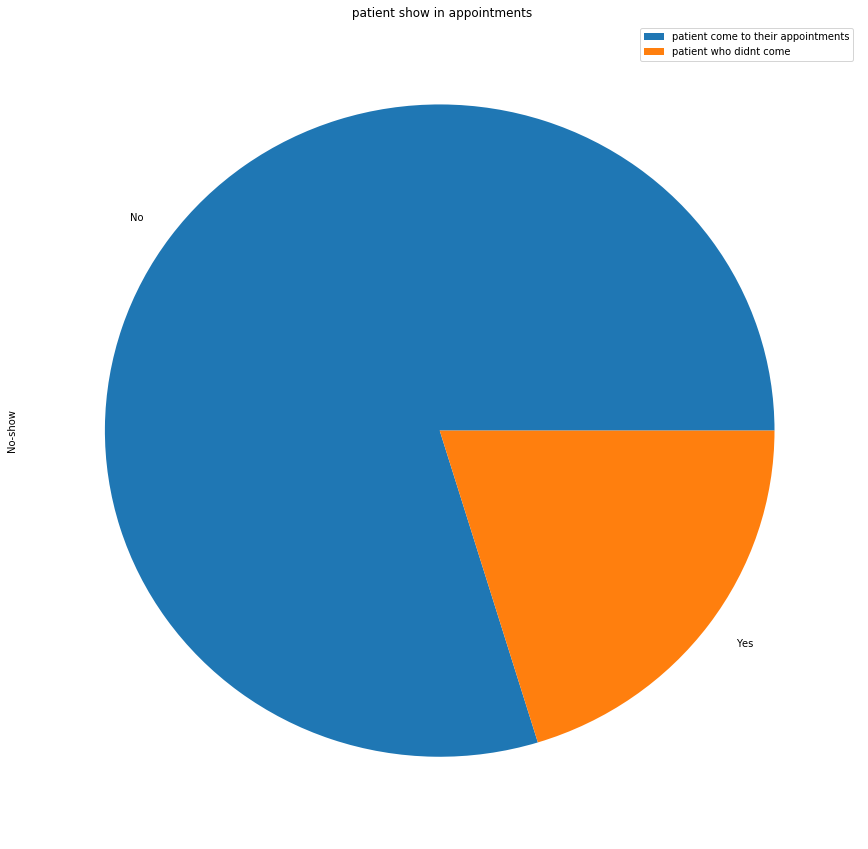

In [31]:
#visulize using pie chart to see the difference between showen to their appointment or not .
df['No-show'].value_counts().plot(kind='pie', figsize=(15,15))
patient_come=df_show['No-show'].count()
patient_come_percent=(patient_come*100)/df['No-show'].count()
patient_didnt_come=df_notshow['No-show'].count()
patient_didnt_come_percent=(patient_didnt_come*100)/df['No-show'].count()
print("Num of patient come to their appointments {NO}  : ",patient_come)
print("With percent   : ",patient_come_percent)
print("Num of patient who didnt come to their appointments {Yes} : ",patient_didnt_come)
print("With percent   : ",patient_didnt_come_percent)
plt.legend(['patient come to their appointments', 'patient who didnt come ']);
plt.title(" patient show in appointments")

Approximatly about 20% of patient doesn't come to their appointments while about 80% make their appointments.

### Research Question 2  (Is age an indicative of whether a patient will make their appointments?)

Total average age of patient:  38.3160851318
Avg ages of patient come to their appointments :  39.0751872648
Avg ages of patient who didnt come to their appointments :  35.3291512915


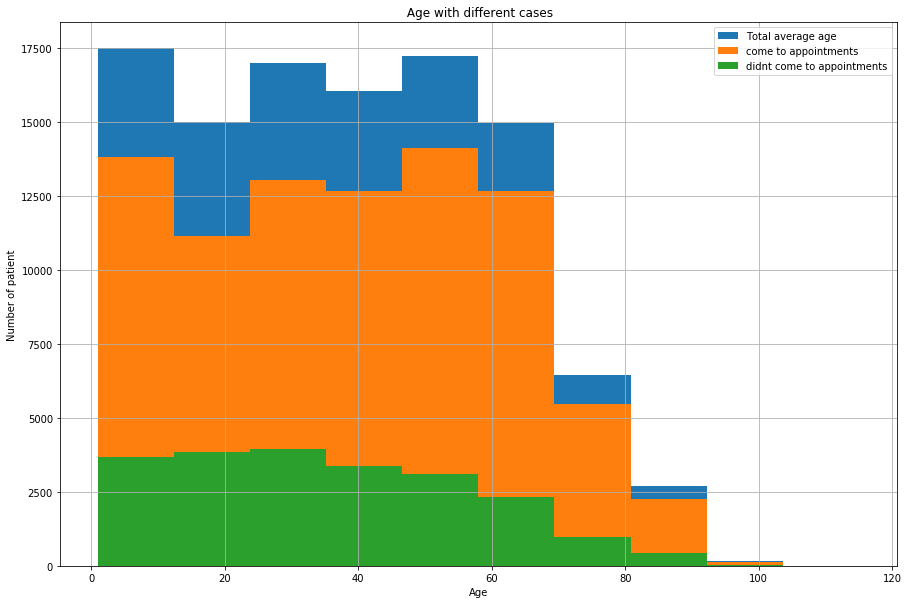

In [36]:
# showing varity of ages between patients to illustrate is it indecative
df['Age'].hist(figsize=(15,10));
print("Total average age of patient: ",df['Age'].mean())
print("Avg ages of patient come to their appointments : ",df_show['Age'].mean())
df_show['Age'].hist();
print("Avg ages of patient who didnt come to their appointments : ",df_notshow['Age'].mean())
df_notshow['Age'].hist();
plt.legend(['Total average age', 'come to appointments', 'didnt come to appointments']);
plt.title(" Age with different cases");
plt.xlabel("Age")
plt.ylabel("Number of patient");

showing the average of age of patient come to thier appointments

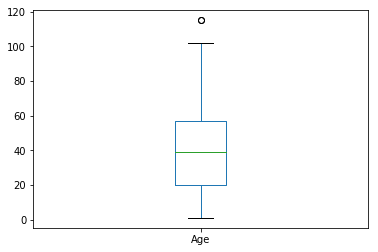

In [39]:
df_show['Age'].plot(kind='box');


showing the average of age of patient who didnt come to thier appointments

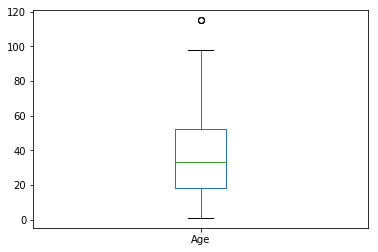

In [40]:
df_notshow['Age'].plot(kind='box');

There is no main difference in age between those who make their appointments or not as age is nearly distributed similary with alittle bit difference but we can say as a whole by mean of both of them that higher age is has a greater probablity to attend 
with these ratio.

In [136]:
ratio_of_attendee=df_show['Age'].mean()/df_notshow['Age'].mean()
print("ratio of ages of patient who come to that didnt come to appointments : ",ratio_of_attendee)

ratio of ages of patient who come to that didnt come to appointments :  1.106032436


### Research Question 3  (What is the relation between the diseases type and no-shows?)

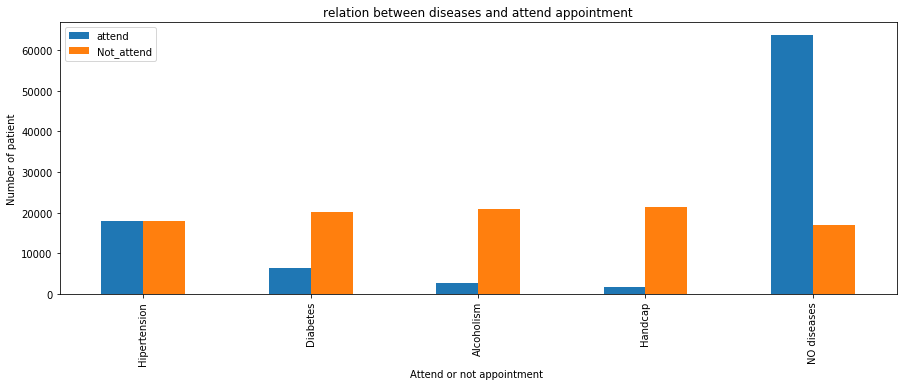

In [35]:
#determine the patients diseases who attend and who's not by knowing first specific diseases and no diseases  patient that show or not. 
Hipertension_attend=sum(df_show['Hipertension']==1)
Hipertension_notattend=sum(df_notshow['Hipertension']== 0)

Diabetes_attend=sum(df_show['Diabetes']==1)
Diabetes_notattend=sum(df_notshow['Diabetes']== 0)

Alcoholism_attend=sum(df_show['Alcoholism']==1)
Alcoholism_notattend=sum(df_notshow['Alcoholism']== 0)

Handcap_attend=sum(df_show['Handcap']==1)
Handcap_notattend=sum(df_notshow['Handcap']== 0)

no_diseases_attend=len(df_show[(df_show['Hipertension'] == False) & (df_show['Diabetes'] == False) & (df_show['Alcoholism'] == False) & (df_show['Handcap'] == False)])
no_diseases_notattend=len(df_notshow[(df_notshow['Hipertension'] == False) & (df_notshow['Diabetes'] == False) & (df_notshow['Alcoholism'] == False) & (df_notshow['Handcap'] == False)])

diseases = {'Name': ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'NO diseases'], 'attend': [Hipertension_attend, Diabetes_attend, Alcoholism_attend, Handcap_attend, no_diseases_attend], 'Not_attend': [Hipertension_notattend, Diabetes_notattend, Alcoholism_notattend, Handcap_notattend, no_diseases_notattend] }  
  
# Create DataFrame  
df_diseases= pd.DataFrame(diseases)  
df_diseases.set_index('Name').plot.bar(figsize=(15,5));
plt.xlabel("Attend or not appointment ")
plt.ylabel("Number of patient")
plt.title("relation between diseases and attend appointment");

 Here is some numbers to clarify .

In [193]:
print ("Hipertension attend {} Hipertension not attend {}".format(Hipertension_attend,Hipertension_notattend))
print ("Diabetes attend {} Diabetes not attend {}".format(Diabetes_attend,Diabetes_notattend))
print ("Alcoholism attend {} Alcoholism not attend {}".format(Alcoholism_attend,Alcoholism_notattend))
print ("Handcap attend {} Handcap not attend {}".format(Handcap_attend,Handcap_notattend))
print ("No-diseases attend {} No-diseases not attend {}".format(no_diseases_attend,no_diseases_notattend))


Hipertension attend 18029 Hipertension not attend 17908
Diabetes attend 6513 Diabetes not attend 20250
Alcoholism attend 2683 Alcoholism not attend 21003
Handcap attend 1675 Handcap not attend 21273
No-diseases attend 63612 No-diseases not attend 16964


The differences between them is very clear.As clear by numbers and graph that attendee is less than that who's not make there appointments except with that who not know what they are patient of and Hypertension its slightily different and can't note
the most active was no-diseases patient.

### Research Question 4  (Does having Scholarship influence patient decision of shows up or not?)

Scholarship attend 8238 
No-Scholarship attend 77069


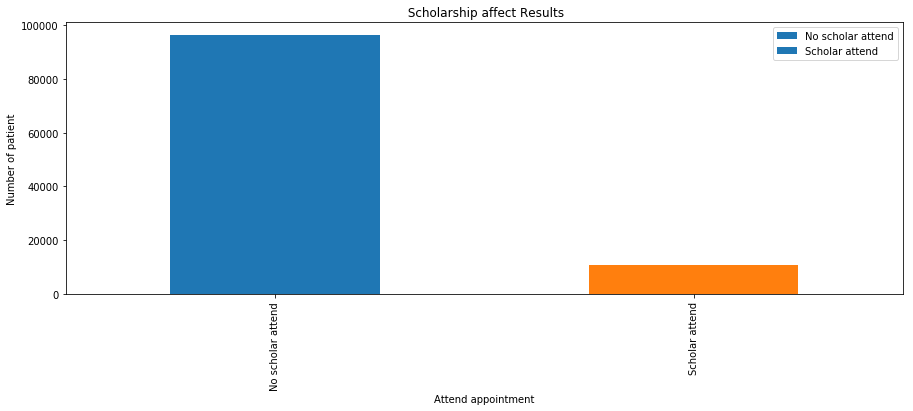

In [29]:
#sort the patient that having scholar or not according to their attendence
scholar_attend=sum(df_show['Scholarship']==1)
no_scholar_attend=sum(df_show['Scholarship']== 0)
df['Scholarship'].value_counts().plot(kind='bar', figsize=(25,5));
plt.title(" Scholarship affect Results")
plt.xlabel("Attend appointment")
plt.ylabel("Number of patient")
indexs = ['No scholar attend', 'Scholar attend']
df['Scholarship'].reindex(index=indexs).plot.bar(figsize=(15,5));
print ("Scholarship attend {} ".format(scholar_attend))
print ("No-Scholarship attend {}".format(no_scholar_attend))
plt.legend(['No scholar attend','Scholar attend']);

Analysis shows that having Scholarship is not affecting of attending appointments as most of the attendee was a non-scholar patients.

### Research Question 5  (Do SMS-reminders increase ratio of patients showing up?)

SMS_received attend 25017 
No-SMS_received attend 60290


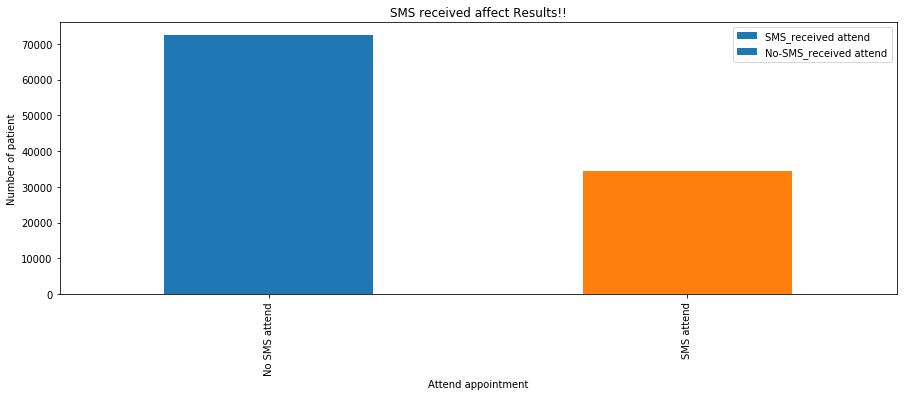

In [30]:
#sorting SMS reminders and its effect by knowing patient who attend after reminder or not.
sms_recive_attend=sum(df_show['SMS_received']==1)
notrecive_sms_attend=sum(df_show['SMS_received']== 0)
df['SMS_received'].value_counts().plot(kind='bar', figsize=(25,5));
plt.title("SMS received affect Results!!")
plt.xlabel("Attend appointment")
plt.ylabel("Number of patient")
indexs = ['No SMS attend', 'SMS attend']
df['SMS_received'].reindex(index=indexs).plot.bar(figsize=(15,5));
print ("SMS_received attend {} ".format(sms_recive_attend))
print ("No-SMS_received attend {}".format(notrecive_sms_attend))
plt.legend(['SMS_received attend', 'No-SMS_received attend']);

Unexpectidely SMS reminder received less than not received patient in attendence!! 

<a id='conclusions'></a>
## Conclusions

> **limitations**: there was some of un logical data like -1 0r 0 age!!.in addition to it will be better if it have different and distributed data segments .also it will be good if there is more information about dataset added  as whether it first appointment or regular one. 

> **points**:Analysis shows 5 different edges of information in these data:
-The percentage of medical appointment attendee and not. It shows that the number of attendee about 80% and not attendee about 20%.

>-Age is not a great indection but the average of older age attendee is more with comparison to the youngest one.

>-Diseases is effective as analysis shows that patient with knowing reasons miss there appointments with great difference to those who didnt know what they have.

>-Scholarsip doesnt make a difference as patient that didnt have one was the most attendee to their appointments. 

>-Unexpectidely, SMS reminder received attendee less than patient who didnt receive SMS .




In [207]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255